In [1]:
import xarray as xr
import xcdat as xc
import numpy as np
import xskillscore as xs
import xesmf

Description:

In zonal mean 2d sets, the mean values for test and ref plots printed on top and middle figures show large difference between cdat version and xcdat version of e3sm_diags v2 vs v3.0.0:

Taking air temperature as example:
mean, v2 = 248 K
mean in v3 = 252 K

Summary:
This notebook shows that the difference is caused by that the mean value provided in v2 is not area weighted, v3 provided area weighted mean value.


Data for testing available from :https://web.lcrc.anl.gov/public/e3sm/zhang40/cdat-migration-fy24/test_data/


In [2]:
# Data can be found at 
test = '/Users/zhang40/Downloads/cdat/ERA5-T-ANN-global_test.nc' 
ref = '/Users/zhang40/Downloads/cdat/ERA5-T-ANN-global_ref.nc' 

In [3]:
test = xr.open_dataset(test)
ref = xr.open_dataset(ref)

In [4]:
#np.testing.assert_allclose(test_1.T.values, test_2.T.values)
#np.testing.assert_allclose(ref_1.T.values, ref_2.T.values)
#np.testing.assert_allclose(diff_1.T.values, diff_2.T_diff.values, atol=1e-4, rtol=1e-7)

In [5]:
z_bnds = test.bounds.get_bounds("Z", "T")
weights = np.abs(z_bnds[:, 1] - z_bnds[:, 0])
v_weights = weights.fillna(0)

In [6]:
spatial_wts = test.spatial.get_weights("Y")
spatial_wts = spatial_wts.fillna(0)

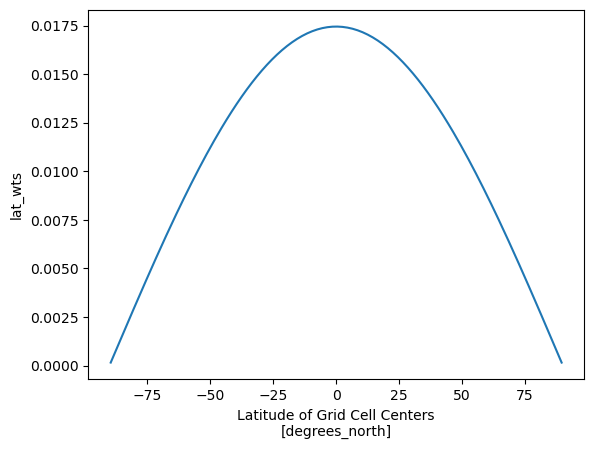

In [7]:
spatial_wts.plot()

In [8]:
weights = spatial_wts * v_weights

In [9]:
# Weighted: This align with xcdat results
test['T'].weighted(weights).mean().values

array(252.36916328)

In [10]:
# Unweighted: This aligns with cdat results
test['T'].mean().values

array(248.31625478)